In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Total number of objects detected: 10


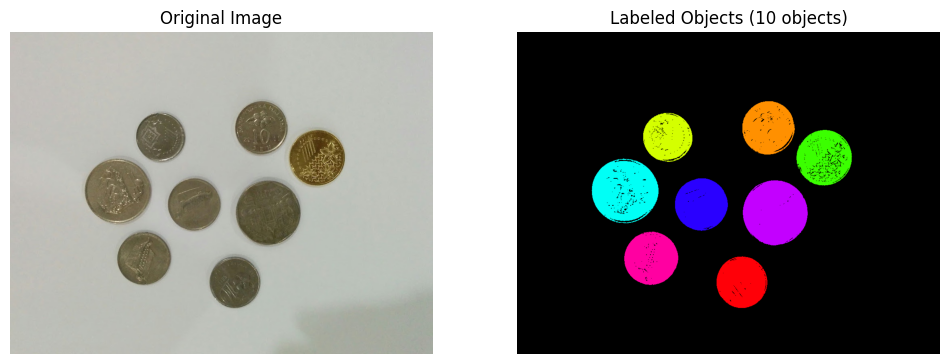

In [4]:
# Load the image
image_path = '/content/111111111.jfif'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a binary threshold to the image
    # Adjust the threshold value (e.g., 127) and type (e.g., cv2.THRESH_BINARY) as needed for your image
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Perform Connected Component Labeling
    # connectivity = 8 specifies 8-way connectivity (pixels touching corners are considered connected)
    # cv2.CCL_WU_ALGORITHM is one of the algorithms for CC labeling
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, 8, cv2.CV_32S)

    # The first label (label 0) is usually the background, so we subtract 1 from num_labels
    num_objects = num_labels - 1

    print(f"Total number of objects detected: {num_objects}")

    # Create a colored map for visualization
    # Skip the background label (label 0)
    label_hue = np.uint8(179 * labels / np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # Convert back to BGR for OpenCV display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # Set background to black (or original image color) to distinguish objects
    labeled_img[labels == 0] = 0

    # Display the original and labeled images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Labeled Objects ({num_objects} objects)')
    plt.axis('off')

    plt.show()